In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')

In [4]:
df.shape

(10886, 12)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.drop(["datetime"],axis = 1,inplace = True)

In [8]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


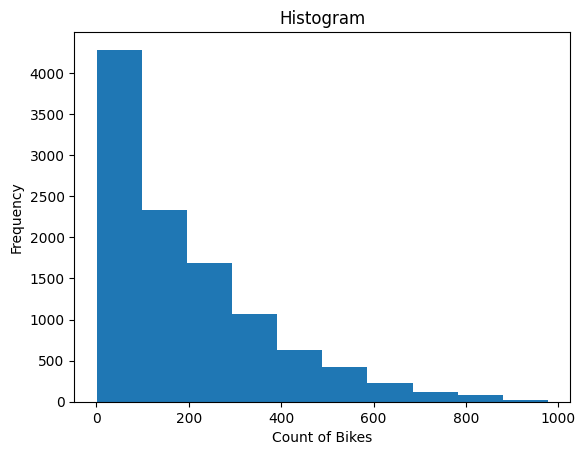

In [9]:
plt.hist(df["count"])
plt.xlabel("Count of Bikes")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x,y

(       season  holiday  workingday  weather   temp   atemp  humidity  \
 0           1        0           0        1   9.84  14.395        81   
 1           1        0           0        1   9.02  13.635        80   
 2           1        0           0        1   9.02  13.635        80   
 3           1        0           0        1   9.84  14.395        75   
 4           1        0           0        1   9.84  14.395        75   
 ...       ...      ...         ...      ...    ...     ...       ...   
 10881       4        0           1        1  15.58  19.695        50   
 10882       4        0           1        1  14.76  17.425        57   
 10883       4        0           1        1  13.94  15.910        61   
 10884       4        0           1        1  13.94  17.425        61   
 10885       4        0           1        1  13.12  16.665        66   
 
        windspeed  casual  registered  
 0         0.0000       3          13  
 1         0.0000       8          32  
 2

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state =42)

In [13]:
x_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
1101,1,0,1,3,17.22,21.210,0,15.0013,4,30
4194,4,0,1,1,21.32,25.000,59,7.0015,38,305
10389,4,0,0,1,11.48,13.635,81,12.9980,3,39
6969,2,0,0,1,25.42,30.305,22,19.9995,185,226
313,1,0,1,1,9.02,9.850,37,26.0027,4,73
...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,8.335,47,11.0014,6,32
5191,4,0,0,1,11.48,12.880,61,19.0012,15,134
5390,4,0,0,1,11.48,13.635,48,16.9979,27,207
860,1,0,0,1,15.58,19.695,17,35.0008,6,16


In [14]:
y_train

1101      34
4194     343
10389     42
6969     411
313       77
        ... 
5734      38
5191     149
5390     234
860       22
7270     358
Name: count, Length: 7293, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor(criterion = 'squared_error',max_depth = 5,min_samples_split = 10,random_state = 5)
treemodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=5)

[Text(0.5, 0.9166666666666666, 'x[9] <= 207.5\nsquared_error = 33026.734\nsamples = 7293\nvalue = 191.862'),
 Text(0.25, 0.75, 'x[9] <= 92.5\nsquared_error = 7051.074\nsamples = 5239\nvalue = 99.855'),
 Text(0.125, 0.5833333333333334, 'x[9] <= 40.5\nsquared_error = 1191.411\nsamples = 3076\nvalue = 40.033'),
 Text(0.0625, 0.4166666666666667, 'x[9] <= 17.5\nsquared_error = 184.891\nsamples = 1951\nvalue = 17.427'),
 Text(0.03125, 0.25, 'x[9] <= 7.5\nsquared_error = 32.431\nsamples = 1243\nvalue = 8.667'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 9.357\nsamples = 753\nvalue = 5.053'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 16.98\nsamples = 490\nvalue = 14.22'),
 Text(0.09375, 0.25, 'x[9] <= 28.5\nsquared_error = 81.257\nsamples = 708\nvalue = 32.808'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 31.189\nsamples = 397\nvalue = 27.015'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 47.653\nsamples = 311\nvalue = 40.203'),
 Text(0.1875, 0.41666

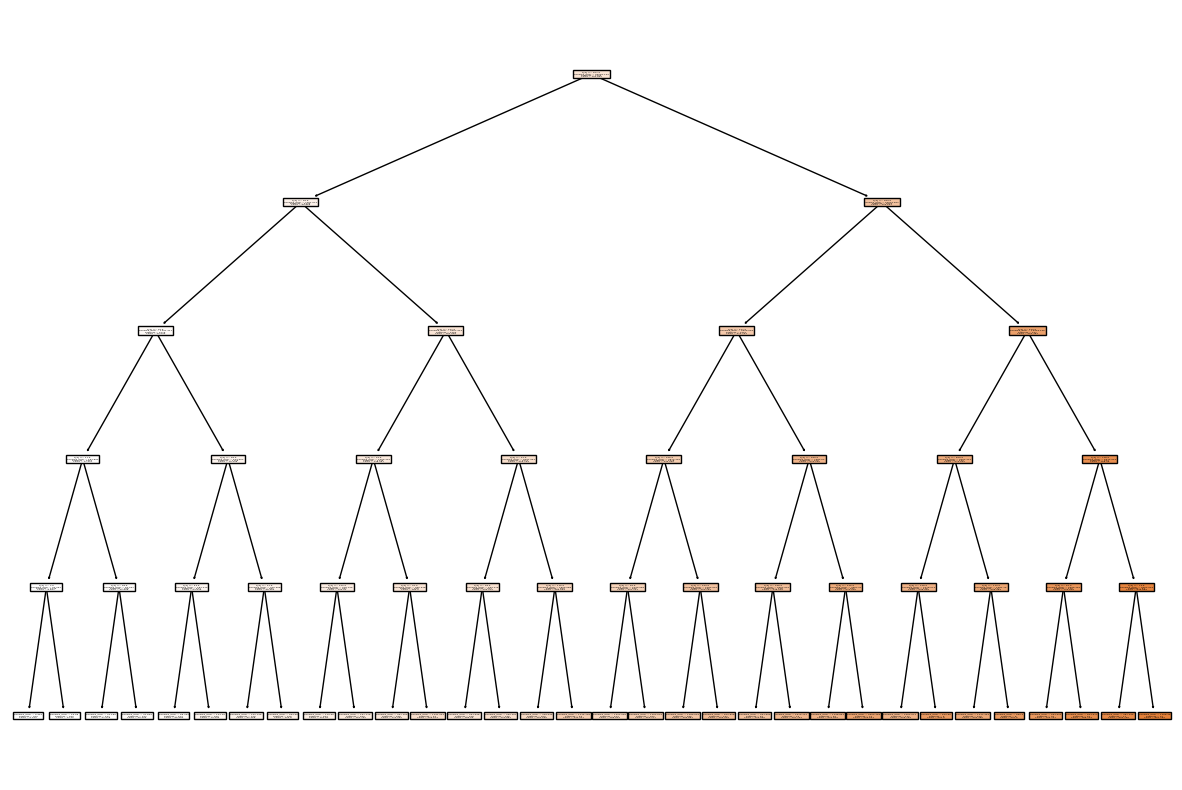

In [16]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled = True)

In [17]:
y_pred = treemodel.predict(x_test)

In [18]:
y_pred

array([121.87044534,  14.22040816, 189.68994413, ..., 285.84294872,
       399.88135593, 350.17701863])

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [20]:
mse

544.7349541236867

In [21]:
np.sqrt(mse)

23.339557710541275

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(treemodel,x_train,y_train,cv = 10)

array([0.98568782, 0.98400483, 0.98104595, 0.98311078, 0.98308433,
       0.98369995, 0.98441768, 0.98571707, 0.97917569, 0.97872901])